In [1]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.11.0


In [3]:
# Importing packages
import numpy as np
from numpy import where
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Importing and cleaning the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [5]:
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [6]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [7]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

Counter({1: 210, 0: 51})


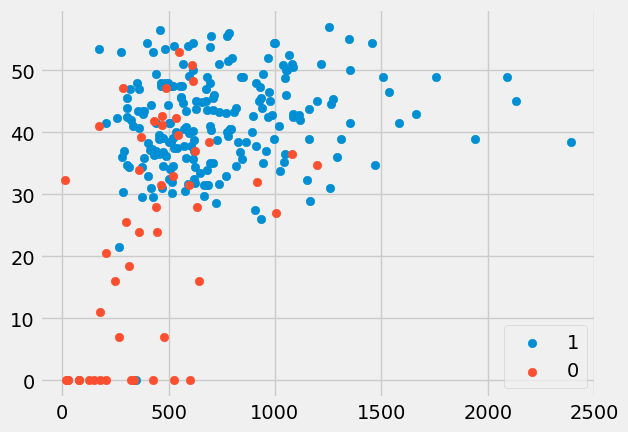

In [8]:
counter = Counter(y_train)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [9]:
# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [11]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 1,
                      learning_rate =0.07, n_estimators=1000,
                      max_depth=50)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [13]:
base_accuracy = evaluate(model, X_test, y_test)

Model Performance
Average Error: 0.1333 degrees.
Accuracy = 86.67%.


Recall metric in the testing dataset: 93.47826086956522%


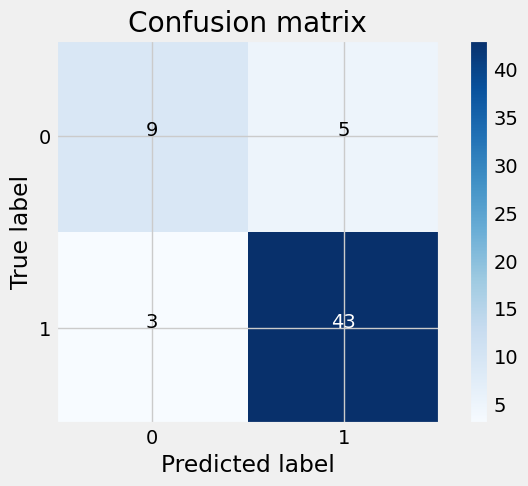

In [14]:
# Classificaton report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = model.predict(X_test)

cnf_matrix = confusion_matrix(y_test,  y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

0.95
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.96      0.98      0.97        46

    accuracy                           0.95        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.95      0.95      0.95        60



C:\Program Files\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


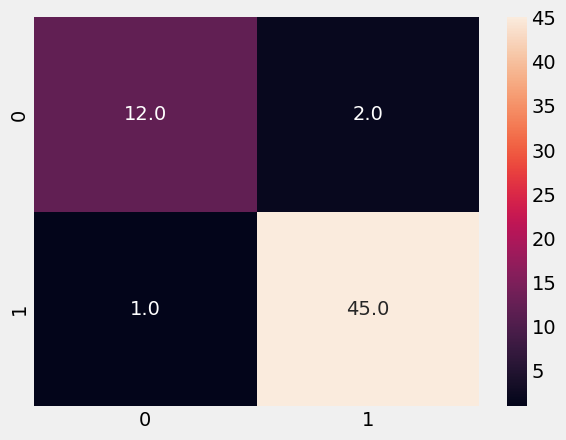

In [15]:
from sklearn.neural_network import MLPClassifier
clf_ = MLPClassifier(random_state=42 )
pred_y = clf_.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, pred_y))
cm = confusion_matrix(y_test, pred_y)
sns.heatmap(cm,annot=True, fmt=".1f")
print(format(classification_report(y_test, pred_y)))

In [16]:
# Modelling
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestClassifier() 
model = forest.fit(X_train, y_train) 
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error
def evaluate(forest, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [18]:
base_accuracy = evaluate(forest, X_test, y_test)

Model Performance
Average Error: 0.0833 degrees.
Accuracy = 91.67%.


Recall metric in the testing dataset: 95.65217391304348%


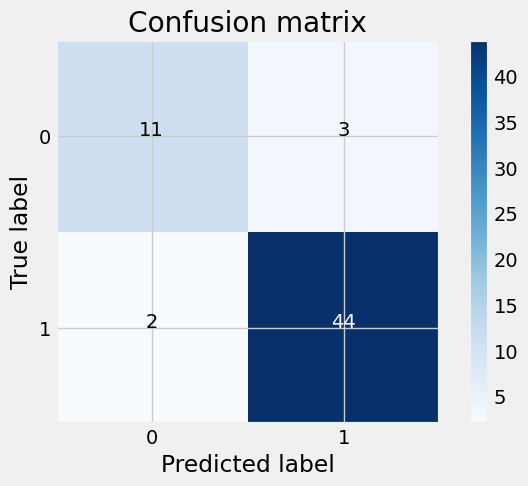

In [19]:
# Classificaton report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test,  y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

y_pred = gbc.fit(X_train, y_train).predict(X_test)
#print(format(classification_report(y_test, y_pred)))
#print(accuracy_score(y_test, y_pred))
from sklearn.metrics import mean_absolute_error
def evaluate(gbc, X_test, y_test):
    predictions =gbc.predict(X_test)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(gbc, X_test, y_test)

Model Performance
Average Error: 0.1000 degrees.
Accuracy = 90.00%.


Recall metric in the testing dataset: 95.65217391304348%


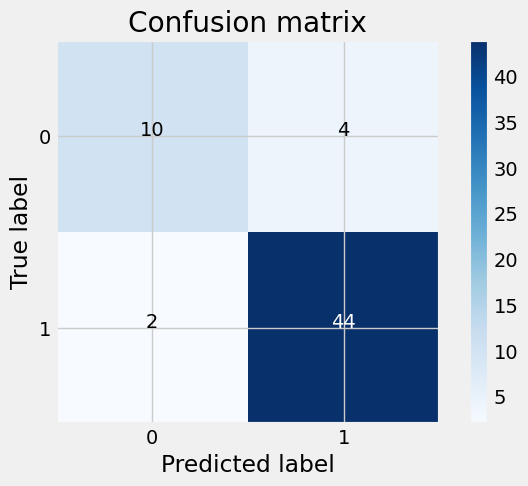

In [21]:
# Classificaton report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = gbc.predict(X_test)

cnf_matrix = confusion_matrix(y_test,  y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

# Two Layer Ensemble Machine learning: A Novel Stacked Generalization

In [22]:
from sklearn.ensemble import StackingClassifier
# define the base models
level0 = list()
level0.append(('rf', RandomForestClassifier(n_estimators= 500,random_state=42)))
level0.append(('xgb', XGBClassifier(random_state = 1,
                      learning_rate =0.07, n_estimators=1000,
                      max_depth=50)))           
level0.append(('gb', GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,max_depth=3, random_state=42)))

In [23]:
# define meta learner model
level1 = MLPClassifier(random_state=42)

In [24]:
# define the stacking ensemble
model_stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model_stacking.fit(X_train, y_train)
model_stacking_pred =model_stacking.predict(X_test)
model_stacking_pred

C:\Program Files\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

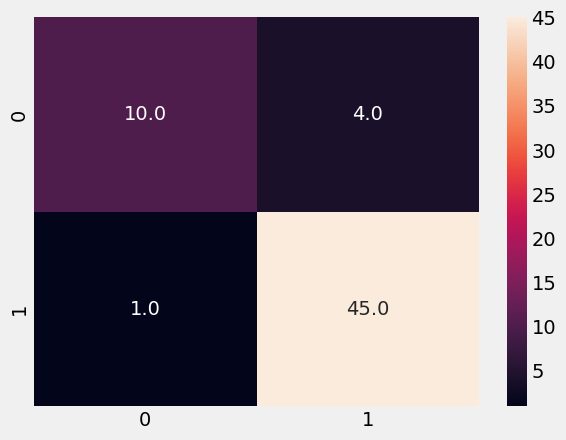

In [25]:
cm = confusion_matrix(y_test, model_stacking_pred)
sns.heatmap(cm,annot=True, fmt=".1f")

In [26]:
print('Classification Report:')
print (classification_report(y_test, model_stacking_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.92      0.98      0.95        46

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60



Random (chance) Prediction: AUROC = 0.500
Stacking Ensemble : AUROC = 0.970


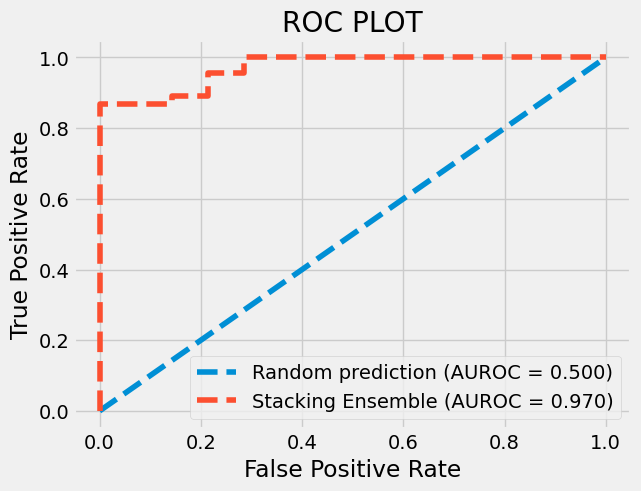

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
prob_y_13 = model_stacking.predict_proba(X_test)

# keep probabilities for the positive outcome only
prob_y_13 = [p[1] for p in prob_y_13]

r_auc = roc_auc_score(y_test, r_probs)
auc1 = roc_auc_score(y_test, prob_y_13)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Stacking Ensemble : AUROC = %.3f' % (auc1))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
prob_y_13_fpr, prob_y_13_tpr, _ = roc_curve(y_test, prob_y_13)
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(prob_y_13_fpr, prob_y_13_tpr, linestyle='--', label='Stacking Ensemble (AUROC = %0.3f)' % auc1)


# Title
plt.title('ROC PLOT')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()